---
layout: post
title: 1/28/25 Live Review
description: Explaining Skill API Feature
categories: ccc
permalink: /feature
toc: True
comments: True
---

# CRUD Integration Checkpoint (01/27/2025)

## Executive Summary:
Developed a system for users to track and manage their skills. 

## Team Purpose:
Our project provides a social platform for users to track and improve their skills, manage profiles, and track progress. 

## Individual Features:
For this review, I focused on the skills feature, where users can input, track, update, and delete their skills. This feature is essential for users to document and modify their skill sets easily, with functionality including creating new skills, updating skill details, and deleting skills they no longer wish to track. The frontend allows users to interact with this system through forms and buttons for the CRUD operations, while the backend stores and processes all data for persistence.

## Frontend Demo:
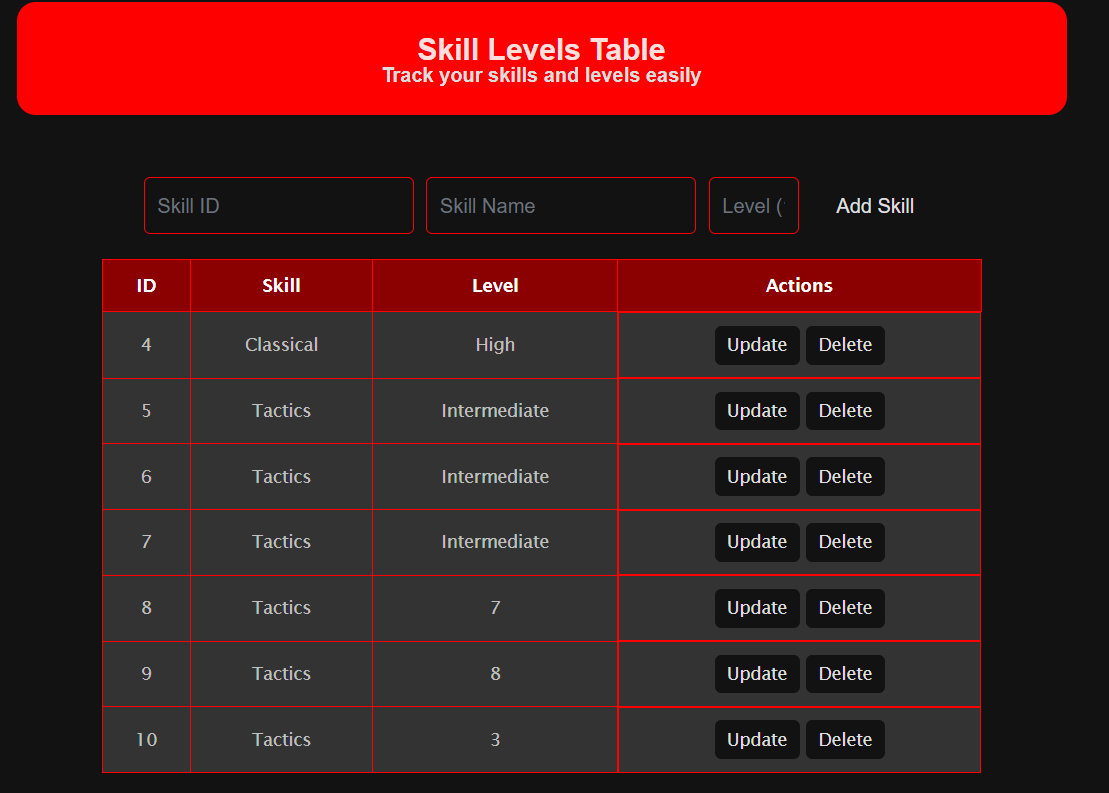
## Backend Demo:
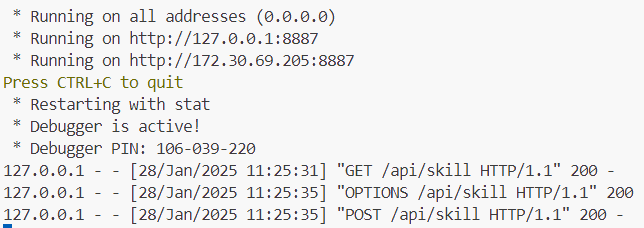
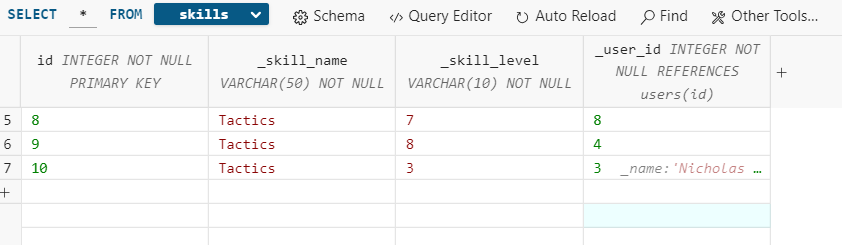



## Input/Output requests:
The Skills API supports the basic CRUD operations:  
- **GET:** Retrieves a list of all skills or a specific skill by ID. This request is handled when the page loads or when a user requests a specific skill.
- **POST:** Allows users to add new skills to the database. This is done through the form on the frontend, where the user submits the skill name, skill level, and user ID.
- **PUT:** Enables users to update existing skills. If a user wishes to update their skill name or skill level, they can modify it using the “Update” button, which sends a PUT request to the API.
- **DELETE:** Removes a specific skill from the database. The user can delete a skill by clicking the “Delete” button next to the corresponding entry.

Requests are handled by Flask_SQLAlchemy, which uses an ORM to manage the interaction with the database, allowing easy retrieval and manipulation of skill data.

## Requests & DOM:
The fetch requests interact with the backend API using the `POST`, `PUT`, `GET`, and `DELETE` methods. After fetching data from the API, the frontend dynamically populates a table to display the skill data. This table allows the user to view and interact with each entry, using buttons for adding, updating, and deleting skills.

The database operations are managed by SQLAlchemy in the backend, which abstracts the SQL queries and simplifies working with the data. The logic for the CRUD functions is handled in the `SkillAPI` class, where each method (POST, GET, PUT, DELETE) processes the request, interacts with the database, and sends back a response to the frontend.


```
    const API_URL = 'http://127.0.0.1:8887/api/skill'; // Replace with your actual API endpoint

    // Fetch skills from the database and display them in the table (GET)
    async function fetchSkills() {
        try {
            // Make a GET request to fetch all skills from the API
            const response = await fetch(API_URL, { method: 'GET' });

            // Handle HTTP errors
            if (!response.ok) throw new Error('Failed to fetch skills.');

            // Parse the JSON response
            const skills = await response.json();

            // Get the skills table element and clear any existing rows
            const table = document.getElementById('skillsTable');
            table.innerHTML = ''; // Clear table before populating

            // Add each skill as a row in the table
            skills.forEach(skill => addRowToTable(skill.id, skill.skill_name, skill.skill_level));
        } catch (error) {
            console.error('Error fetching skills:', error);
        }
    }

    // Add a new skill to the database and table (POST)
    async function addSkill(event) {
        event.preventDefault(); // Prevent form submission to avoid page refresh

        // Retrieve values from input fields
        const idInput = document.getElementById('idInput').value.trim();
        const skillInput = document.getElementById('skillInput').value.trim();
        const rankInput = document.getElementById('rankInput').value.trim();

        // Validate input fields
        if (idInput && skillInput && rankInput) {
            const newSkill = {
                skill_name: skillInput, // Skill name
                skill_level: rankInput, // Skill level
                user_id: parseInt(idInput, 10), // User ID (convert string to integer)
            };

            try {
                // Make a POST request to add the new skill
                const response = await fetch(API_URL, {
                    method: 'POST',
                    headers: { 'Content-Type': 'application/json' },
                    body: JSON.stringify(newSkill),
                });

                // Handle HTTP errors
                if (!response.ok) throw new Error('Failed to add skill.');

                // Parse the response and update the table
                const result = await response.json();
                addRowToTable(result.id, result.skill_name, result.skill_level);

                // Clear input fields after successful submission
                document.getElementById('idInput').value = '';
                document.getElementById('skillInput').value = '';
                document.getElementById('rankInput').value = '';
            } catch (error) {
                console.error('Error adding skill:', error);
            }
        }
    }

    // Add a new row to the table (helper function)
    function addRowToTable(id, skillName, level) {
        const table = document.getElementById('skillsTable');
        const row = table.insertRow(); // Create a new row in the table

        // Insert cells for ID, Skill Name, and Level
        row.insertCell(0).textContent = id;
        row.insertCell(1).textContent = skillName;
        row.insertCell(2).textContent = level;

        // Create a cell for action buttons (Update and Delete)
        const actionCell = row.insertCell(3);
        actionCell.classList.add('action-buttons');

        // Create and configure the Update button
        const updateButton = document.createElement('button');
        updateButton.textContent = 'Update';
        updateButton.classList.add('update-button');
        updateButton.onclick = () => updateRow(row, id);

        // Create and configure the Delete button
        const deleteButton = document.createElement('button');
        deleteButton.textContent = 'Delete';
        deleteButton.classList.add('delete-button');
        deleteButton.onclick = () => deleteRow(row, id);

        // Append the buttons to the action cell
        actionCell.appendChild(updateButton);
        actionCell.appendChild(deleteButton);
    }

    // Update a skill in the database and table (PUT)
    async function updateRow(row, id) {
        // Get the current values from the row
        const skillCell = row.cells[1];
        const levelCell = row.cells[2];

        // Prompt the user for new values
        const newSkillName = prompt('Update Skill Name:', skillCell.textContent);
        const newLevel = prompt('Update Level:', levelCell.textContent);

        // If the user provides valid inputs, proceed with the update
        if (newSkillName !== null && newLevel !== null) {
            const updatedSkill = {
                id: id, // Skill ID
                skill_name: newSkillName.trim(), // New skill name
                skill_level: newLevel.trim(), // New skill level
                user_id: parseInt(id, 10), // User ID (convert string to integer)
            };

            try {
                // Make a PUT request to update the skill
                const response = await fetch(`${API_URL}`, {
                    method: 'PUT',
                    headers: { 'Content-Type': 'application/json' },
                    body: JSON.stringify(updatedSkill),
                });

                // Handle HTTP errors
                if (!response.ok) throw new Error('Failed to update skill.');

                // Update the table row with the new values
                skillCell.textContent = updatedSkill.skill_name;
                levelCell.textContent = updatedSkill.skill_level;
            } catch (error) {
                console.error('Error updating skill:', error);
            }
        }
    }

    // Delete a skill from the database and remove the row (DELETE)
    async function deleteRow(row, id) {
        // Confirm the deletion with the user
        if (confirm('Are you sure you want to delete this skill?')) {
            try {
                // Make a DELETE request to remove the skill
                const response = await fetch(`${API_URL}`, {
                    method: 'DELETE',
                    headers: { 'Content-Type': 'application/json' },
                    body: JSON.stringify({ id }), // Send the skill ID in the request body
                });

                // Handle HTTP errors
                if (!response.ok) throw new Error('Failed to delete skill.');

                // Remove the row from the table on success
                row.remove();
            } catch (error) {
                console.error('Error deleting skill:', error);
            }
        }
    }

    // Attach event listener to the form for adding skills
    document.getElementById('addSkillForm').addEventListener('submit', addSkill);

    // Fetch and display skills when the page loads
    window.onload = fetchSkills;
```
## Algorithmic Request:
The `_CRUD` class within the API handles the main operations: POST, PUT, and DELETE requests. When the frontend triggers one of these actions (e.g., clicking the “Add Skill” button or updating a skill), the corresponding method in the class is executed. Each method takes the necessary input data, processes it, and calls the appropriate function to interact with the database.
```
class SkillAPI:
    class _CRUD(Resource):
        def post(self):
            """
            Create a new skill entry.
            """
            data = request.get_json()

            # Validate required fields
            if not data or 'skill_name' not in data or 'skill_level' not in data or 'user_id' not in data:
                return {'message': 'Skill Name, Level, and User ID are required.'}, 400

            # Create a new skill
            skill = Skill(
                skill_name=data.get('skill_name'),
                skill_level=data.get('skill_level'),
                user_id=data.get('user_id')
            )
            try:
                skill.create()
                return jsonify(skill.read())
            except Exception as e:
                return {'message': f'Error saving skill: {e}'}, 500

        def get(self):
            """
            Retrieve a skill by ID or all skills.
            """
            skill_id = request.args.get('id')

            # Fetch a specific skill if ID is provided
            if skill_id:
                skill = Skill.query.get(skill_id)
                if not skill:
                    return {'message': 'Skill not found'}, 404
                return jsonify(skill.read())

            # Fetch all skills
            all_skills = Skill.query.all()
            return jsonify([skill.read() for skill in all_skills])

        def put(self):
            """
            Update an existing skill entry.
            """
            data = request.get_json()

            # Validate required fields
            if not data or 'id' not in data:
                return {'message': 'ID is required for updating a skill'}, 400

            # Find the skill by ID
            skill = Skill.query.get(data['id'])
            if not skill:
                return {'message': 'Skill not found'}, 404

            # Update the skill
            try:
                if 'skill_name' in data:
                    skill._skill_name = data['skill_name']
                if 'skill_level' in data:
                    skill._skill_level = data['skill_level']
                if 'user_id' in data:
                    skill._user_id = data['user_id']
                skill.create()  # Save changes
                return jsonify(skill.read())
            except Exception as e:
                return {'message': f'Error updating skill: {e}'}, 500

        def delete(self):
            """
            Delete a skill entry.
            """
            data = request.get_json()

            # Validate required fields
            if not data or 'id' not in data:
                return {'message': 'ID is required for deleting a skill'}, 400

            # Find the skill by ID
            skill = Skill.query.get(data['id'])
            if not skill:
                return {'message': 'Skill not found'}, 404

            # Delete the skill
            try:
                skill.delete()
                return {'message': 'Skill deleted successfully'}, 200
            except Exception as e:
                return {'message': f'Error deleting skill: {e}'}, 500
```


For instance, in the `delete` method, when a user clicks the delete button, the method obtains the skill ID, searches for it in the database, and deletes the entry. This ensures that the skill is completely removed from the system. The response is returned to the frontend, confirming the action with either a success or error message.

## Call to Algorithm Request:
The backend logic is triggered by frontend events such as form submissions and button clicks. For example, when the “Add Skill” button is clicked, the form data is sent as a POST request to the API. The request body contains the skill details (name, level, user ID), and the backend creates the new entry in the database.

Similarly, when a user clicks the “Update” or “Delete” button for a specific skill, the frontend sends the corresponding PUT or DELETE request to the API. The backend processes these requests and updates the database accordingly. After each operation, a GET request is automatically triggered to refresh the frontend and display the latest data.

For all actions (POST, PUT, DELETE), error handling is implemented in both frontend and backend. In case of an issue, an appropriate message is displayed to the user, and the operation is canceled if necessary.

### Fetch Request
```

    // Fetch skills from the database and display them in the table (GET)
    async function fetchSkills() {
        try {
            const response = await fetch(API_URL, { method: 'GET' });
            if (!response.ok) throw new Error('Failed to fetch skills.');

            const skills = await response.json();
            const table = document.getElementById('skillsTable');
            table.innerHTML = ''; // Clear table before populating

            skills.forEach(skill => addRowToTable(skill.id, skill.skill_name, skill.skill_level));
        } catch (error) {
            console.error('Error fetching skills:', error);
        }
    }
```